In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, HDBSCAN
from sklearn.datasets import make_blobs

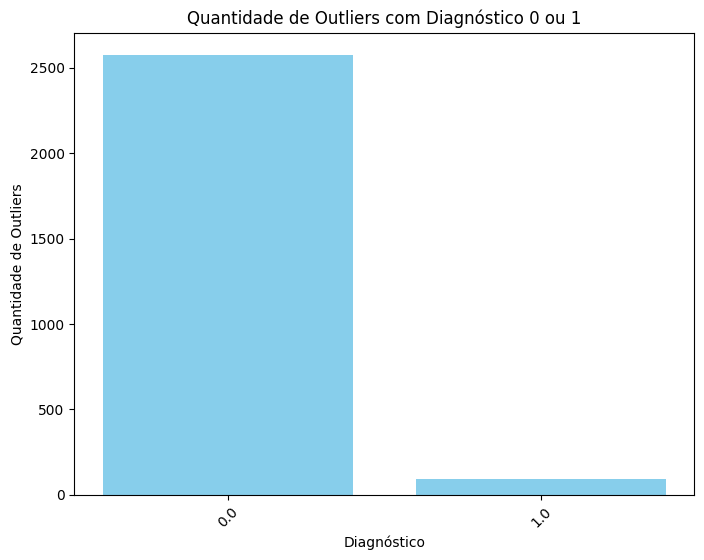

In [10]:
# Carregar e preparar os dados
df = pd.read_csv('df_regressao.csv')

# Separar a variável preditora e as variáveis independentes
X = df.drop(columns=['diagnostico'])
y = df['diagnostico']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=6, min_samples=10)
labels = dbscan.fit_predict(X_scaled)

# Atualizar a coluna com rótulos do DBSCAN
df['dbscan_labels'] = labels

# Identificar outliers
outliers = df[df['dbscan_labels'] == -1]

# Filtrar outliers com valores 0 ou 1 na coluna 'diagnostico'
outliers_filtered = outliers[outliers['diagnostico'].isin([0, 1])]

# Contar a quantidade de pontos com valores 0 ou 1 na coluna 'diagnostico'
count_values = outliers_filtered['diagnostico'].value_counts()

# Plotar a quantidade de pontos com valores 0 ou 1
plt.figure(figsize=(8, 6))
plt.bar(count_values.index.astype(str), count_values.values, color='skyblue')
plt.xlabel('Diagnóstico')
plt.ylabel('Quantidade de Outliers')
plt.title('Quantidade de Outliers com Diagnóstico 0 ou 1')
plt.xticks(rotation=45)
plt.show()


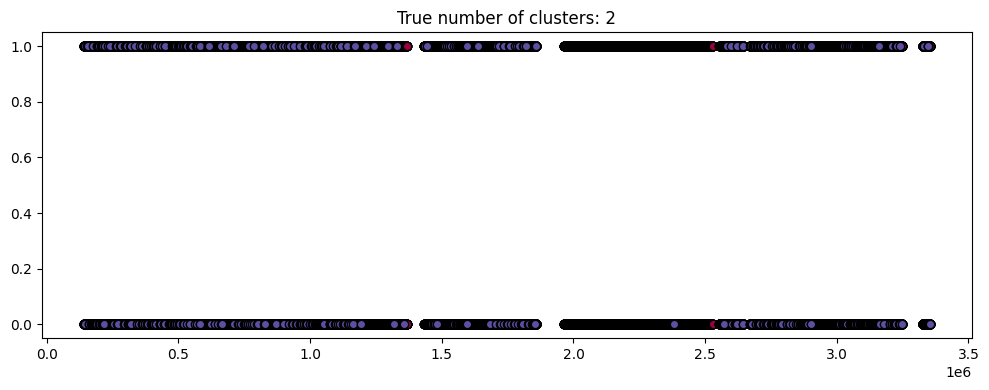

In [45]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))

    # Verifique se X é um DataFrame e converta para um array NumPy se necessário
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Labels e probabilidades devem ser arrays numpy
    labels = np.array(labels)
    probabilities = np.array(probabilities) if probabilities is not None else np.ones(X.shape[0])

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    # The probability of a point belonging to its labeled cluster determines the size of its marker
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_index = np.where(labels == k)[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    
    ax.set_title(title)
    plt.tight_layout()

X = df.drop(columns=['diagnostico'])
y = df['diagnostico']

plot(X, y, ground_truth=True)


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Suponha que você já tenha um DataFrame df com a coluna 'diagnostico'
# df = pd.read_csv('seu_arquivo.csv')

# Normalizar os dados (se necessário)
X = df.drop('diagnostico', axis=1)  # Exclua a coluna 'diagnostico' para a normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=6, min_samples=10)  # Ajuste eps e min_samples conforme necessário
outliers = dbscan.fit_predict(X_scaled)

# Adicionar os resultados de cluster ao DataFrame original
df['cluster'] = outliers

# Identificar os outliers (cluster == -1)
outliers_df = df[df['cluster'] == -1]

# Contar quantos outliers têm diagnóstico 0 e 1
diagnostico_counts = outliers_df['diagnostico'].value_counts()

print("Número de outliers com diagnóstico 0:", diagnostico_counts.get(0, 0))
print("Número de outliers com diagnóstico 1:", diagnostico_counts.get(1, 0))

Número de outliers com diagnóstico 0: 2577
Número de outliers com diagnóstico 1: 95
